In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_path = "cifar-10-batches-py/"

In [4]:
import numpy as np

train_X = []
train_y = []

for i in range(5):
    print(data_path+"data_batch_"+str(i+1))
    dataset = unpickle(data_path+"data_batch_"+str(i+1))
    train_X.append(dataset[b'data'])
    train_y.append(dataset[b'labels'])
    
print(np.array(train_X).shape)
print(np.array(train_y).shape)

cifar-10-batches-py/data_batch_1
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/data_batch_5
(5, 10000, 3072)
(5, 10000)


In [5]:
X = np.concatenate((train_X[0],train_X[1],train_X[2],train_X[3],train_X[4]),axis=0)
y = np.concatenate((train_y[0],train_y[1],train_y[2],train_y[3],train_y[4]),axis=0)
print(X.shape)
print(y.shape)

(50000, 3072)
(50000,)


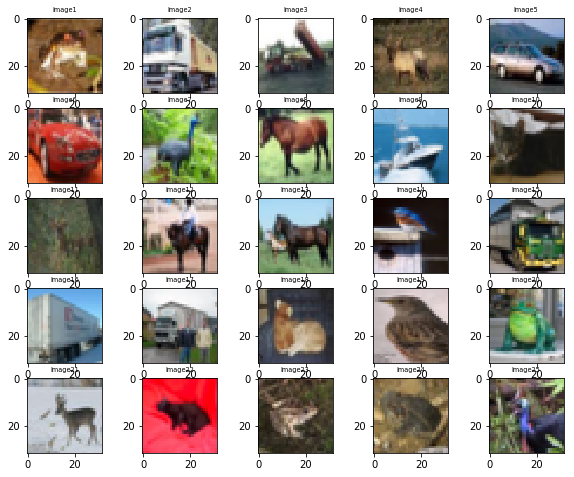

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
n_row = 5
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X[i,:].reshape(3,32,32).transpose([1, 2, 0]))
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [7]:
test = unpickle(data_path+"test_batch")

test_x = test[b'data']
test_y = test[b'labels']

print(test_x.shape)
print(len(test_y))

(10000, 3072)
10000


In [8]:
## applying PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [9]:
pca.explained_variance_.shape

(3072,)

In [10]:
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

In [11]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(X)
x_test_pca = pca.transform(test_x)

In [12]:
## Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_pca, y)

/home/snow/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
## Predicting
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(test_y, y_pred_rf)
random_forest_score

0.2398

In [14]:
## KNN
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(test_y, y_pred_knn)
knn_score

0.1459

In [16]:
## SVM
svc = svm.SVC()
svc.fit(x_train_pca, y)

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
## Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(test_y, y_pred_svm)
svc_score

0.4837

In [18]:
## Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_pca, y)

/home/snow/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/snow/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(test_y, y_pred_lr)
logistic_regression_score

0.4007

In [20]:
## Comparison between the above Classifiers
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.2398
K Nearest Neighbors :  0.1459
Logistic Regression :  0.4007
Support Vector Classifier :  0.4837


In [21]:
## Neural Networks
## Creating a model
from keras.models import Sequential
from  keras.layers  import Dense

model = Sequential()

# For first layer, input shape must be supplied
layer1 = Dense(units = 50, activation = 'relu', input_dim = k)
model.add(layer1)

layer2 = Dense(units = 25, activation = 'relu')
model.add(layer2)

layer3 = Dense(units = 10, activation = 'sigmoid')
model.add(layer3)

Using TensorFlow backend.


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [26]:
## Onehot Encoding the labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y_train_encoded = enc.fit_transform(np.array(y).reshape(-1, 1))
y_test_encoded = enc.transform(np.array(test_y).reshape(-1, 1))

/home/snow/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
model.fit(x_train_pca, y_train_encoded, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 19s 384us/step - loss: 0.3027 - acc: 0.8964
Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2448 - acc: 0.9095
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2269 - acc: 0.9144
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.2142 - acc: 0.9182
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2037 - acc: 0.9217
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1958 - acc: 0.9244
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1890 - acc: 0.9271
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1831 - acc: 0.9291
Epoch 9/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1788 - acc: 0.9305
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1749 - 

In [30]:
model.evaluate(x_test_pca, y_test_encoded)

10000/10000 [==============================] - 1s 53us/step


[0.4299875180721283, 0.8926899926185607]